In [ ]:
# Installing necessary packages
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

#Importing necessary data from csv's
FRRate = pd.read_csv("C:/Users/lilni/OneDrive - Mount St. Mary's University/Desktop/FRED Data Science/Effective_Rate_Q.csv")
CC_Delinquency = pd.read_csv("C:/Users/lilni/OneDrive - Mount St. Mary's University/Desktop/FRED Data Science/CC_Delinq_Q.csv")
Avg_Home_Price = pd.read_csv("C:/Users/lilni/OneDrive - Mount St. Mary's University/Desktop/FRED Data Science/AVG_House_Price_Q.csv")
Personal_Income = pd.read_csv("C:/Users/lilni/OneDrive - Mount St. Mary's University/Desktop/FRED Data Science/Disposable_Income_Q.csv")
US_Imports = pd.read_csv("C:/Users/lilni/OneDrive - Mount St. Mary's University/Desktop/FRED Data Science/US_Imports_Q.csv")
#Renaming necessary columns for better legibility
FRRate.rename(columns={'DFF':'Effective_Rate'}, inplace = True)
CC_Delinquency.rename(columns={'DRCCLACBS':'CC_Delinq'}, inplace = True)
Avg_Home_Price.rename(columns={'ASPUS':'Home_Price'}, inplace = True)
Personal_Income.rename(columns={'DSPIC96':'Disposable_Income'}, inplace = True)
US_Imports.rename(columns={'IMPGS':'Imports'}, inplace = True)
#Changing data type to numeric for the sake of analyses
FRRate['Effective_Rate'] = pd.to_numeric(FRRate['Effective_Rate'], errors = 'coerce')
CC_Delinquency['CC_Delinq'] = pd.to_numeric(CC_Delinquency['CC_Delinq'], errors = 'coerce')
Avg_Home_Price['Home_Price'] = pd.to_numeric(Avg_Home_Price['Home_Price'], errors = 'coerce')
Personal_Income['Disposable_Income'] = pd.to_numeric(Personal_Income['Disposable_Income'], errors = 'coerce')
US_Imports['Imports'] = pd.to_numeric(US_Imports['Imports'], errors = 'coerce')

In [ ]:
#Merge the datasets together based on their common column, 'DATE'
Raw_Variables = FRRate.merge(CC_Delinquency, on = 'DATE', how = 'inner').merge(Avg_Home_Price, on = 'DATE', how = 'inner').merge(Personal_Income, on = 'DATE', how = 'inner').merge(US_Imports, on = 'DATE', how = 'inner')
#print(Variables01)
Variables = Raw_Variables[['Effective_Rate', 'CC_Delinq', 'Home_Price', 'Disposable_Income', 'Imports']]

In [7]:
#Create the correlation matrix
Cor_Matrix = Variables.corr()
print(Cor_Matrix)

                   Effective_Rate  CC_Delinq  Home_Price  Disposable_Income  \
Effective_Rate           1.000000   0.775309    0.616392           0.480243   
CC_Delinq                0.775309   1.000000    0.076399           0.118457   
Home_Price               0.616392   0.076399    1.000000           0.721377   
Disposable_Income        0.480243   0.118457    0.721377           1.000000   
Imports                  0.670078   0.138738    0.951150           0.623294   

                    Imports  
Effective_Rate     0.670078  
CC_Delinq          0.138738  
Home_Price         0.951150  
Disposable_Income  0.623294  
Imports            1.000000  


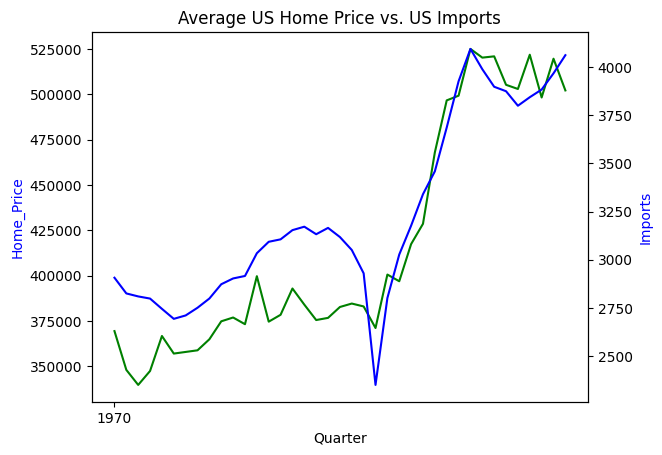

In [33]:
#After seeing a quite significant correlation coefficient (0.95) between Average Home Price and US Imports, I had to look further into this relationship.
#Create line graph that illustrates the evolution of both variables
data_for_graph = Raw_Variables[['DATE','Home_Price', 'Imports']]
graph_data = {
    'Time': pd.to_datetime(Raw_Variables['DATE']),
    'Home_Price':Raw_Variables['Home_Price'],
    'Imports':Raw_Variables['Imports']
}

df = pd.DataFrame(graph_data)

df['Quarter'] = df['Time'].dt.to_period('Q')

fig, axis1 = plt.subplots()

axis1.plot(df['Quarter'].astype(str), df['Home_Price'], color = 'g')
axis1.set_xlabel('Quarter')
axis1.set_ylabel('Home_Price', color = 'b')

axis2 = axis1.twinx()
axis2.plot(df['Quarter'].astype(str), df['Imports'], color = 'b')
axis2.set_ylabel('Imports', color = 'b')

axis1.xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(1))
axis1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

plt.title('Average US Home Price vs. US Imports')
plt.show()

In [6]:
#Run an Independent Samples T-test on the variables
